In [32]:
import os
import requests
import io
from io import BytesIO
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pydub import AudioSegment
from pathlib import Path

In [33]:
audio_path = Path(r"C:\Users\Keese\Documents\GitHub\WhosThisPokemon\sounds")

In [34]:
pokemon_json = requests.get("https://pokeapi.co/api/v2/pokemon/4").json()
#pokemon_image_url = pokemon_json["sprites"]["other"]["official-artwork"]["front_default"]
pokemon_image_url = pokemon_json["sprites"]["front_default"]
image_io = requests.get(pokemon_image_url).content
image = Image.open(io.BytesIO(image_io)).convert("RGB")
gray_image = image.convert("L")
gray_image_numpy = np.copy(np.asarray(gray_image))

In [35]:
# r = requests.get(pokemon_json["cries"]["legacy"])
# pokemon_json["cries"]["legacy"]
# cry_url = pokemon_json["cries"]["legacy"]
# cry_content = requests.get(cry_url)
# with open(f"sounds\{str(9)}.ogg", "wb") as o:
#     o.write(cry_content.content)
# sound = AudioSegment.from_ogg(audio_path / (str(9)+".ogg"))
# #sound.export(audio_path / (str(9)+".mp3"), format="mp3")

In [36]:
pokemon_json["types"][0]["type"]["name"], len(pokemon_json["types"])

('fire', 1)

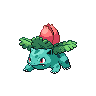

In [17]:
height, width = np.where(gray_image_numpy ==0) 
gray_image_numpy[height, width] = 255
image

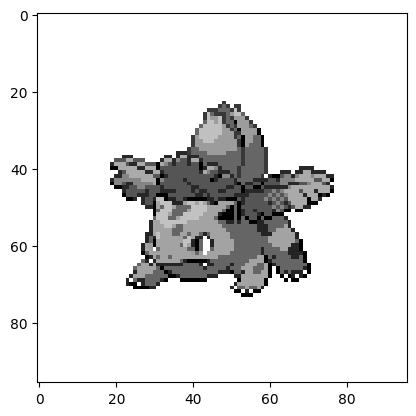

In [18]:
plt.imshow(gray_image_numpy, cmap="gray")

In [78]:
poke = Image.fromarray(gray_image_numpy)
poke = poke.resize((350,350), Image.Resampling.NEAREST)
poke_numpy = np.copy(np.asarray(poke)) 
height, width = np.where(poke_numpy <255)
poke_numpy[height, width] = 0
poke_numpy = poke_numpy[np.min(height): np.max(height), np.min(width):np.max(width)]

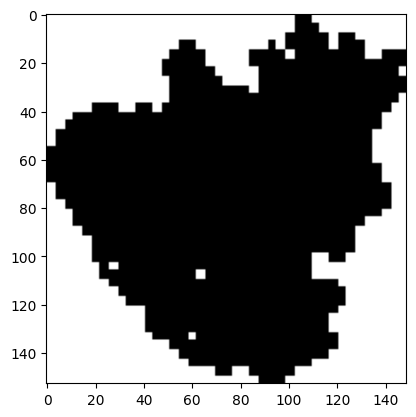

In [79]:
plt.imshow(poke_numpy, cmap="gray")

In [80]:
poke = Image.fromarray(poke_numpy)

In [81]:
background = Image.open("whos_that_poke.png")

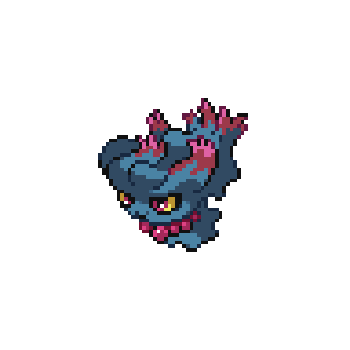

In [93]:
temp = image.resize((350, 350), Image.Resampling.NEAREST).convert("L")
temp2 = image.resize((350, 350), Image.Resampling.NEAREST)
np_temp = np.copy(np.asarray(temp))
h, w = np.where(np_temp==0)
np_temp[h,w] = 255
np_temp2 = np_temp = np.copy(np.asarray(temp2))
np_temp[h,w, :] = 255
temp2 = Image.fromarray(np_temp)
temp2

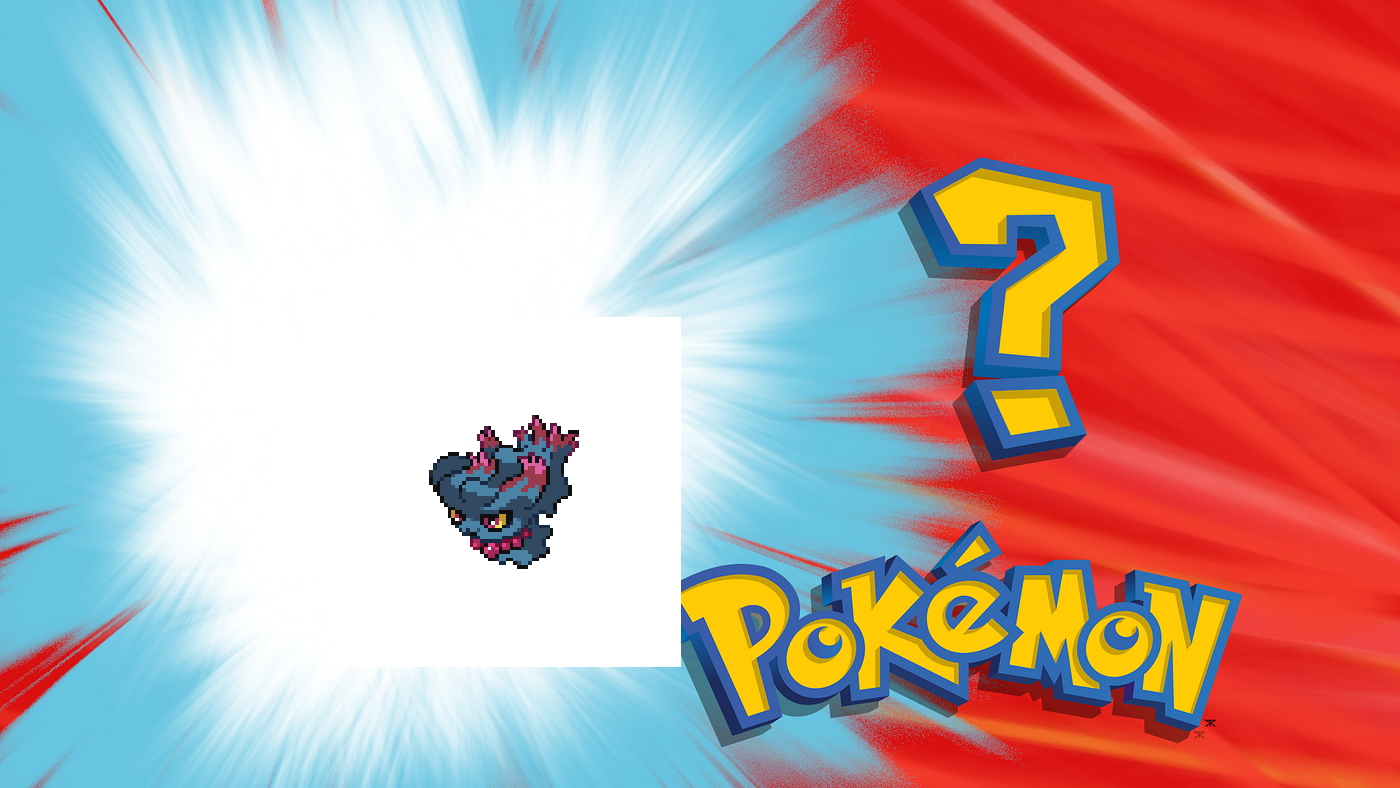

In [94]:
height, width, channel = np.asarray(background).shape
who = Image.new("RGBA", (width, height), (255, 255, 255, 255))
who.paste(background)
resized_height, resized_width = poke.size
anker = (405- int(resized_height/2), int(394-(resized_width/2)))
who.paste(temp2, anker)
who

In [68]:
res_image = image.resize((350,350), Image.Resampling.NEAREST)
np_img = np.copy(np.asarray(res_image))
np_img[height, width, :] = 0

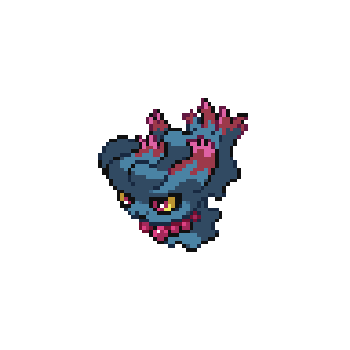

In [76]:
image.resize((350, 350), Image.Resampling.NEAREST)

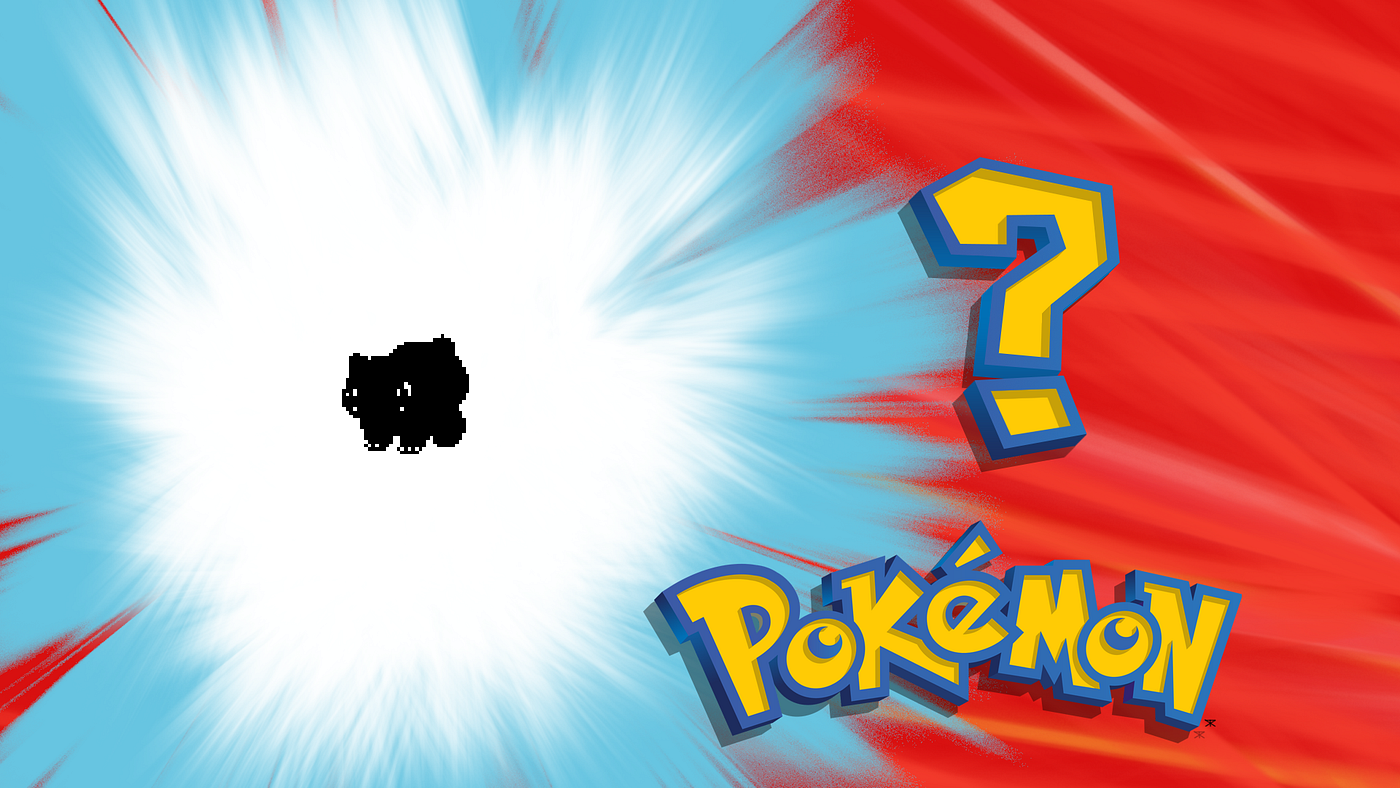

In [28]:
img = grab_poke(url="https://pokeapi.co/api/v2/pokemon/", poke_number=1)
resized_img = turn_black_resize(img)
result = create_whos_poke(resized_img)
result

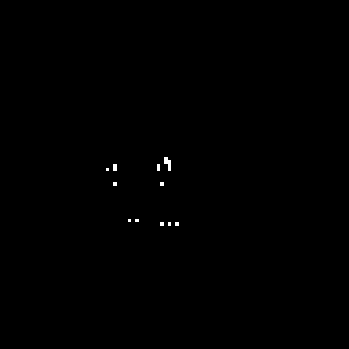

In [26]:
resized_img